# AI Powered Recipe Recommendation System 

#### Data Analysis Mathematics, Algorithms and Modeling
##### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

### Introduction

In the world, where people are more health conscious and work driven, often face difficulty to prepare meals considering time, ingredients availability and dietary preferences. Although there are a millions of recipes available on internet, it requires efforts to find the one with fits with available resources. 

The objective of this project to utilize advanced technologies backed up with large dataset helps to generate customized meal suggestions based on user input.
#### Problem Statement:

The project's goal is to create a recipe recommendation system powered by AI that makes meal planning easier. A dataset containing 231638 recipes is filtered by ingredients, dietary restrictions, and time constraints to provide users with personalised food recommendations. Based on user choices, this system offers quick, customised meal selections.

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [28]:
import numpy as np
import pandas as pd 
from scipy import stats
import ast
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


##### RawRecipe : Dataset in classes and methods

In [29]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [30]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [31]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recipe Id

In [32]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


### Data Preprocessing

##### 1. Columns for nutrition Values

- Nutrition columns are stored as array of numbers [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0] those are ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'] accordingly
- Those are separated in columns

In [33]:
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
merged_data[nutrition_columns] = merged_data['nutrition'].str.strip('[]').str.split(',', expand=True)
merged_data[nutrition_columns] = merged_data[nutrition_columns].apply(pd.to_numeric, errors='coerce')

##### 2. Binary labeling for recipe popularity

In [34]:
merged_data['popular'] = (merged_data['rating'] >= 4).astype(int)

In [35]:
merged_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,rating,review,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,popular
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5,I used an acorn squash and recipe#137681 Swee...,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5,This was a nice change. I used butternut squas...,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1


### Hypothesis

***Null Hypothesis (H₀)*** <br>
There is no significant difference in the mean calorie content based on the levels of total fat, sugar, protein, or saturated fat.

***Alternative Hypothesis (H₁)***<br>
There is a significant difference in the mean calorie content based on the levels of total fat, sugar, protein, or saturated fat.

##### Apply Normalization for columns considered in null hypothesis : z-score normalization

In [36]:
# Select numerical columns for normalization
numerical_cols = ["calories","total_fat","sugar","sodium","protein","saturated_fat","carbohydrates"]

# Z-score normalization
for col in numerical_cols:
    merged_data[f"{col}_norm"] = (merged_data[col] - merged_data[col].mean()) / merged_data[col].std()

merged_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,saturated_fat,carbohydrates,popular,calories_norm,total_fat_norm,sugar_norm,sodium_norm,protein_norm,saturated_fat_norm,carbohydrates_norm
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,4.0,1,-0.396817,-0.472918,-0.103266,-0.265144,-0.453201,-0.465453,-0.166323
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,4.0,1,-0.396817,-0.472918,-0.103266,-0.265144,-0.453201,-0.465453,-0.166323


#### Review Distribution

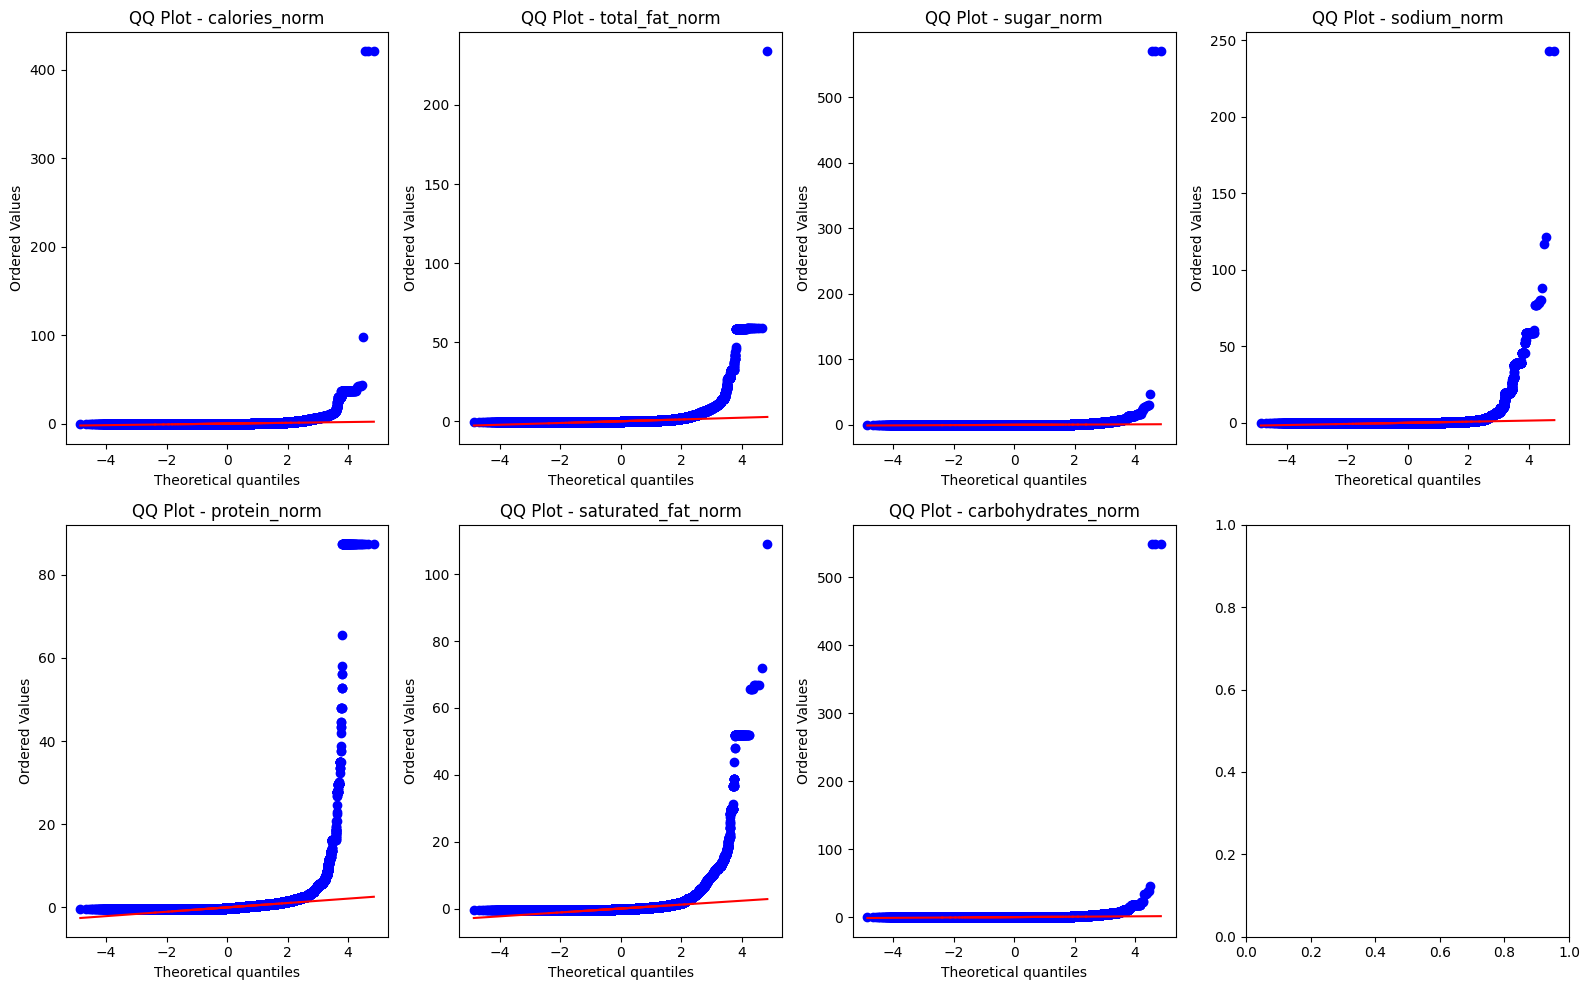

In [37]:
# Create a 4x2 grid of subplots (4 rows and 2 columns)

numerical_cols_norm = ["calories_norm","total_fat_norm","sugar_norm","sodium_norm","protein_norm","saturated_fat_norm","carbohydrates_norm"]

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

# Plot QQ plot for each column
for i, col in enumerate(numerical_cols_norm):
    
    # Get the data for the column
    data = merged_data[col].dropna()  # Drop NaN values if any

    # Create QQ plot
    stats.probplot(data, dist="norm", plot=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f"QQ Plot - {col}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


- The QQ plots displayed for various nutritional columns (calories, total fat, sugar, sodium, protein, saturated fat, and carbohydrates) suggest that the distributions of these variables are highly skewed. 
- In each plot, the data points deviate significantly from the red line (the normal distribution) at both the lower and upper ends, indicating that the distributions are not normal. 
- For most of the variables, there are substantial deviations in the tails of the plots, with many points clustered in the lower range and a few outliers at higher values. This suggests the presence of heavy tails or possible outliers.


#### Corelation

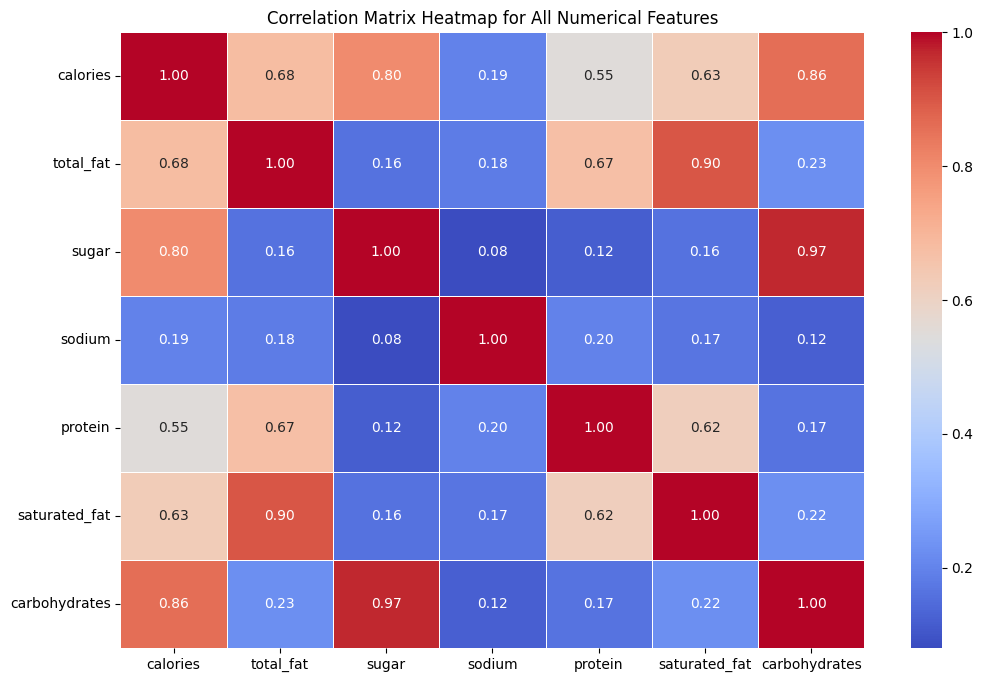

In [38]:
# Extract all numerical columns from the dataset
# numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for all numerical columns
correlation_matrix = merged_data[numerical_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for All Numerical Features")
plt.show()

#### ANOVA

As our data is continuous ( not categorical), We will be applying ANOVA test in order to identify relation between calories and other nutritional columns.

In [39]:
# List of variables to test
variables = ['total_fat_norm', 'sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm']

# Create bins for each variable and perform ANOVA
for var in variables:
    # Create bins for the variable
    merged_data[f'{var}_bins'] = pd.qcut(merged_data[var], q=3, labels=['Low', 'Medium', 'High'])

    # Group calorie data by bins
    low = merged_data[merged_data[f'{var}_bins'] == 'Low']['calories_norm']
    medium = merged_data[merged_data[f'{var}_bins'] == 'Medium']['calories_norm']
    high = merged_data[merged_data[f'{var}_bins'] == 'High']['calories_norm']

    # Perform ANOVA
    anova_result = f_oneway(low, medium, high)
    
    # Print results
    print(f"ANOVA Result for {var}:")
    print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}\n")


ANOVA Result for total_fat_norm:
F-statistic: 54421.76089842816, p-value: 0.0

ANOVA Result for sugar_norm:
F-statistic: 12556.693286927115, p-value: 0.0

ANOVA Result for sodium_norm:
F-statistic: 30610.07739933088, p-value: 0.0

ANOVA Result for protein_norm:
F-statistic: 36017.375547281335, p-value: 0.0

ANOVA Result for saturated_fat_norm:
F-statistic: 44927.13900311199, p-value: 0.0



For all variables (total fat, sugar, sodium, protein, and saturated fat), **the p-values are 0.0**, which are well below the significance threshold (0.05). 
<br>
<br>
This indicates that there are significant differences in the mean calorie content across the levels of these variables. 
<br>
<br>
Thus, we **reject the null hypothesis (H₀) for all cases** and conclude that **these variables are strong predictors of calorie content.**

### Dimensionality Reduction : using PCA

PCA reduces the dimensionality of your dataset by transforming correlated variables into a smaller number of uncorrelated principal components. Each component explains a portion of the dataset's variance.

Why? PCA works best when the data is scaled, as it relies on variance. Here we have already applied z-score normalization on our numerical columns for null and revised hypothesis. we can apply PCA.

In [40]:
features = ['total_fat_norm', 'sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm', 'carbohydrates_norm']
X = merged_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print explained variance
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: Explained Variance = {var:.4f}, Cumulative Variance = {cum_var:.4f}")



PC1: Explained Variance = 0.4641, Cumulative Variance = 0.4641
PC2: Explained Variance = 0.2872, Cumulative Variance = 0.7513
PC3: Explained Variance = 0.1560, Cumulative Variance = 0.9073
PC4: Explained Variance = 0.0727, Cumulative Variance = 0.9800
PC5: Explained Variance = 0.0157, Cumulative Variance = 0.9957
PC6: Explained Variance = 0.0043, Cumulative Variance = 1.0000


PC1 explains 46.41% of the variance, making it the most significant principal component.<br>
PC2 explains 28.72% of the variance, bringing the cumulative variance explained to 75.13%.<br>
PC3 explains 15.60% of the variance, making the cumulative variance reach 90.73%.<br>
PC4 explains 7.27% of the variance, increasing the cumulative variance to 98.00%.<br>
PC5 and PC6 explain only minor amounts of variance (1.57% and 0.43%, respectively), contributing minimally to the overall dataset variance.

In [41]:
pca = PCA(n_components=2)  # Choose the number of components
X_reduced = pca.fit_transform(X_scaled)

In [42]:
loadings = pd.DataFrame(pca.components_, columns=features, index=[f"PC{i+1}" for i in range(pca.n_components_)])
print(loadings)

     total_fat_norm  sugar_norm  sodium_norm  protein_norm  \
PC1        0.519100    0.326614     0.189101      0.445729   
PC2       -0.288428    0.631599    -0.042185     -0.277381   

     saturated_fat_norm  carbohydrates_norm  
PC1            0.508648            0.361528  
PC2           -0.279527            0.600864  


***Principal Component 1***<br>
- Total Fat has a positive loading (0.5191), meaning it contributes significantly to this component. As the total fat increases, PC1 also increases.
- Saturated Fat has a positive loading (0.5086), which indicates it also contributes to PC1.
- Sugar has a positive loading (0.3266), so it also contributes to PC1, though to a lesser extent than total fat.
- Carbohydrates has a positive loading (0.3615), suggesting a moderate contribution to PC1.

***Principal Component 2***<br>
- Sugar has a high positive loading (0.6316), meaning it contributes most strongly to PC2.
- Carbohydrates has a high positive loading (0.6009), indicating that as carbohydrates increase, PC2 also increases.
- Total Fat has a negative loading (-0.2884), indicating an inverse relationship with PC2. As total fat increases, PC2 decreases.
- Protein has a negative loading (-0.2774), indicating that as protein increases, PC2 decreases.
- Saturated Fat has a negative loading (-0.2795), meaning as saturated fat increases, PC2 decreases.

**PC1 seems to capture a "fat and protein" dimension, whereas PC2 captures a "sugar and carbohydrates" dimension.**

### Time Series Analysis

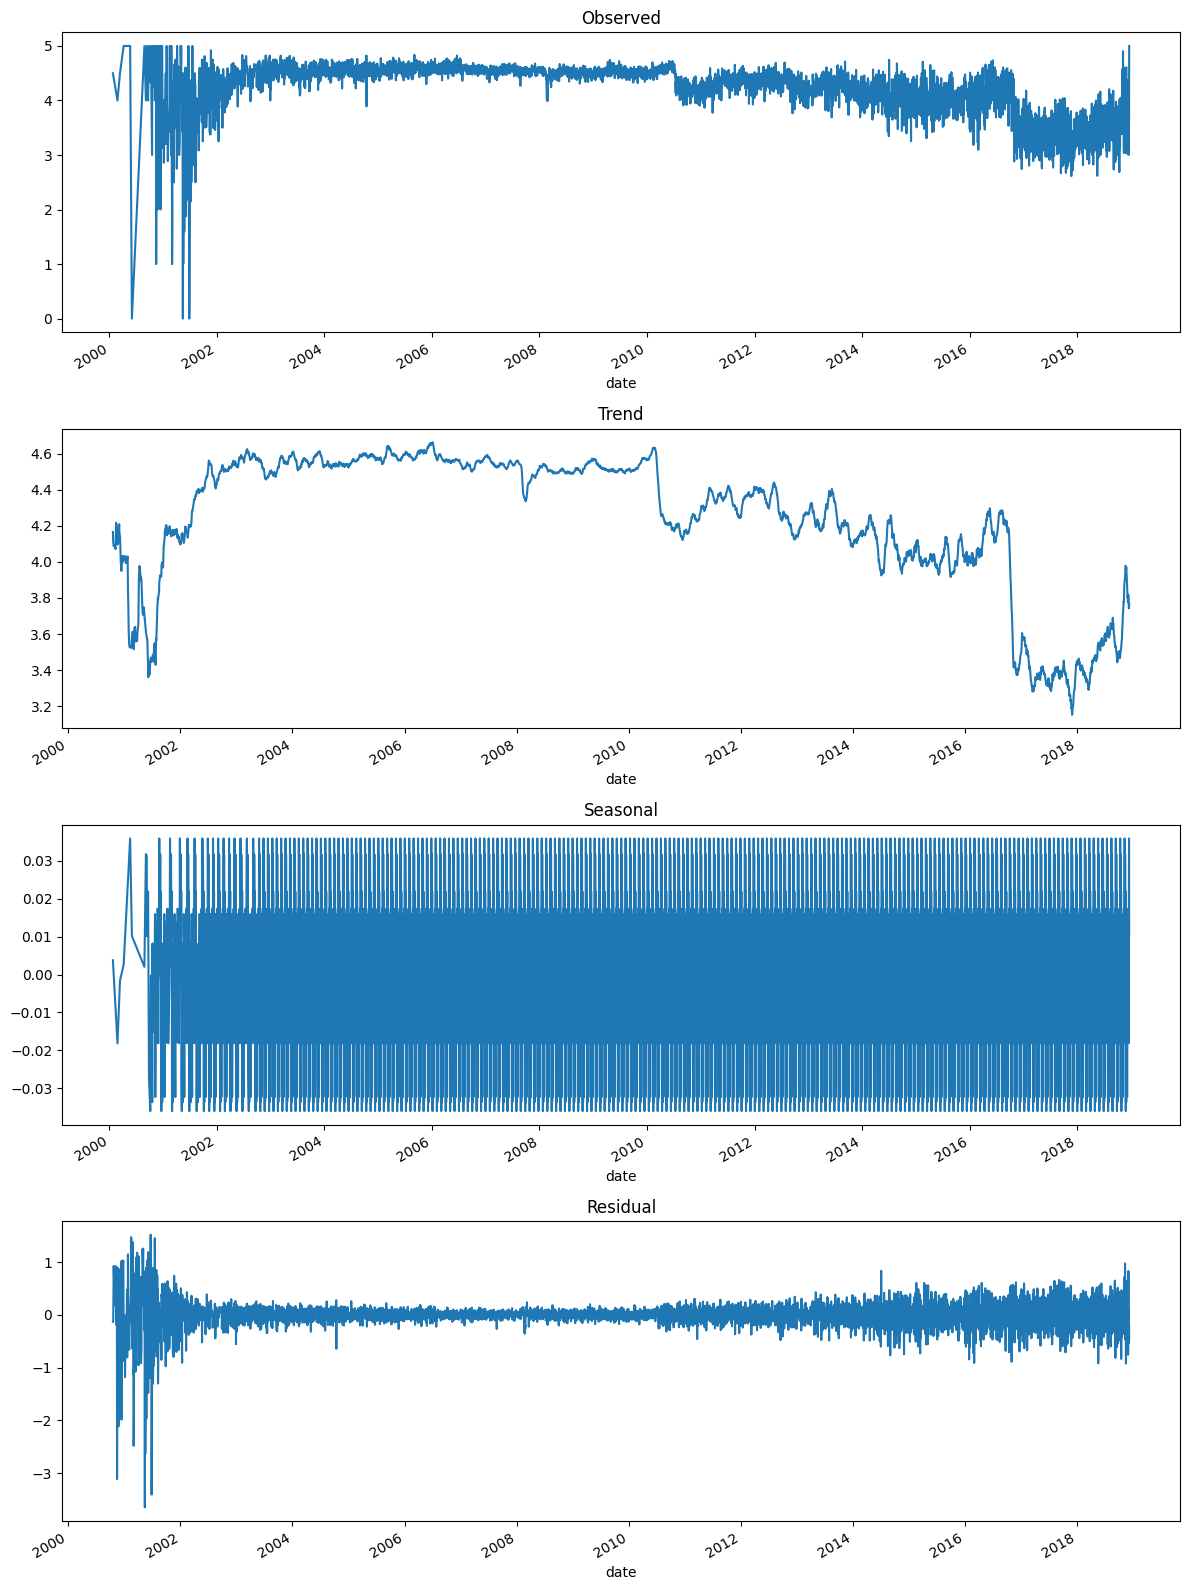

In [43]:
# Convert 'date' to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Group by date and calculate average rating
daily_ratings = merged_data.groupby('date')['rating'].mean().reset_index()

# Perform time series decomposition
decomposition = seasonal_decompose(daily_ratings.set_index('date'), model='additive', period=30)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()


### Clustering

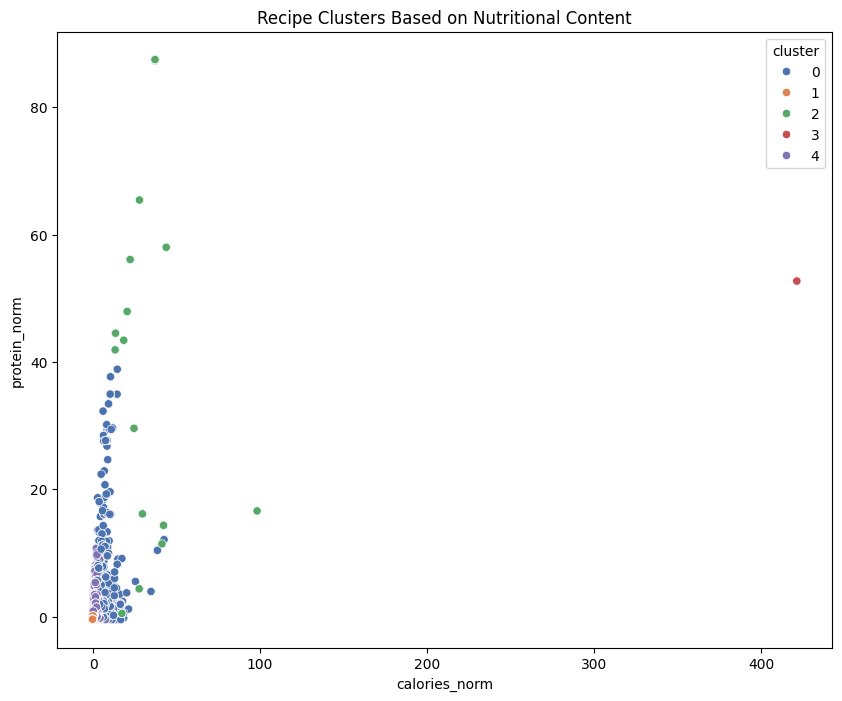

In [44]:
# Select nutritional features
nutrition_features = ['calories_norm', 'total_fat_norm', 'sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm', 'carbohydrates_norm']
X = merged_data[nutrition_features]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_data, x='calories_norm', y='protein_norm', hue='cluster', palette='deep')
plt.title('Recipe Clusters Based on Nutritional Content')
plt.show()


### Regression

In [45]:
X = merged_data[['calories_norm', 'protein_norm', 'total_fat_norm']]
y = merged_data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 1.5959373571831723
R-squared Score: 0.0004728842367355268


### Classification

In [46]:
merged_data['popular'] = (merged_data['rating'] >= 4.5).astype(int)

X = merged_data[['minutes', 'n_steps', 'n_ingredients']]
y = merged_data['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.7166738786792303
              precision    recall  f1-score   support

           0       0.41      0.04      0.08     63064
           1       0.73      0.98      0.83    163410

    accuracy                           0.72    226474
   macro avg       0.57      0.51      0.45    226474
weighted avg       0.64      0.72      0.62    226474



### Probabilistic Reasoning

We can use Naive Bayes for probabilistic classification of recipes into different cuisine types

In [47]:
# Function to extract cuisine from tags
def extract_cuisine(tags):
    cuisine_keywords = ['italian', 'mexican', 'chinese', 'indian', 'french', 'japanese', 'thai', 'greek', 'spanish', 'american']
    tags_list = ast.literal_eval(tags)
    for tag in tags_list:
        for cuisine in cuisine_keywords:
            if cuisine in tag.lower():
                return cuisine
    return 'other'

# Create 'cuisine' column
merged_data['cuisine'] = merged_data['tags'].apply(extract_cuisine)

# Now you can proceed with the original code
X = merged_data['ingredients'].apply(lambda x: ' '.join(eval(x)))
y = merged_data['cuisine']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5533527027385042


### Implement Probabilistic Reasoning adequately

For this project, probabilistic reasoning can be effectively implemented in various ways:

#### 1. Bayesian Recommendation Models:

By calculating the likelihood that a recipe will be relevant given a user preferences, Bayesian probability can be used to recommend recipes. For instance:

**P(recipe | preferences)= P(preferences | recipe)⋅P(recipe)/P(preferences)**

This makes it possible to include uncertainties and past data regarding user behavior or the popularity of a dish.

In [48]:
merged_data = merged_data.drop_duplicates(subset=['name'])

In [49]:
# Add a 'popularity' column (you can modify this based on your data)
merged_data['popularity'] = np.random.rand(len(merged_data))  # Random popularity values for example

# Now, you can proceed with your computation
def compute_any_likelihood(recipe, preferences):
    likelihood = 0.0

    # Condition 1: Dietary restrictions
    if any(diet in recipe['tags'] for diet in preferences['dietary_restrictions']):
        likelihood += 0.4  # Assign partial weight if dietary restriction is matched

    # Condition 2: Available ingredients
    if any(ingredient in recipe['ingredients'] for ingredient in preferences['available_ingredients']):
        likelihood += 0.4  # Assign partial weight if ingredients match

    # Condition 3: Time constraint
    if recipe['minutes'] <= preferences['time_limit']:
        likelihood += 0.2  # Assign partial weight if time is within limits

    return likelihood

# User preferences
user_preferences = {
    'dietary_restrictions': ['vegetarian', 'gluten-free'],
    'available_ingredients': ['tomato', 'onion', 'cheese'],
    'time_limit': 30
}

# Computing likelihood for each recipe
merged_data['likelihood'] = merged_data.apply(lambda row: compute_any_likelihood(row, user_preferences), axis=1)

# Computing posterior probability
merged_data['posterior'] = merged_data['popularity'] * merged_data['likelihood']
merged_data['posterior'] /= merged_data['posterior'].sum()  # Normalize

# Recommend top recipes
top_any_condition = merged_data.sort_values(by='posterior', ascending=False).head(5)
print("Top Recommendation :")
print(top_any_condition[['name', 'posterior']])

Top Recommendation :
                                                      name  posterior
782233          penne  spinach  asparagus and cashew salad   0.000024
735172                                 onion dip and chips   0.000024
841395   rajas con cerveza  pepper strips with beer and...   0.000024
1107097                        whole wheat cheese crackers   0.000024
637193                  low fat ranch dressing and dip mix   0.000024


The top five meal recommendations are displayed in the Top Recommendation list according to how well they suit your tastes. Every recipe has a posterior probability, which is a number that shows the likelihood that it will work for you. The more likely it is, the more closely the recipe will fit your tastes. The top five recipes in this instance all have the same probability (0.000024), indicating that they are all equally good choices. In order to suggest meals that best suit your needs, these recommendations are based on variables such as dietary restrictions, ingredients that are readily available, and time limits.

#### 2.Markov Decision Processes (MDP):

MDPs can simulate the likelihood of switching between these states if the system contains sequential decision-making, such as suggesting meal courses (appetizer, main course, dessert).

Sequential decision-making situations, where the decision-maker (such a recommender system) must make a series of decisions that affect subsequent decisions, can be effectively modeled using Markov Decision Processes (MDPs). An MDP can be used to simulate the states, actions, and transitions between these stages when suggesting meal courses (appetizer, main course, dessert, etc.)


In [50]:
import numpy as np

# Defining states (stages of the meal)
states = ['Appetizer', 'Main Course', 'Dessert']

# Defining actions (meal options for each course)
actions = {
    'Appetizer': ['Salad', 'Soup', 'Fried Chicken'],
    'Main Course': ['Pasta', 'Steak', 'Salmon'],
    'Dessert': ['Cake', 'Ice Cream', 'Fruit Salad']
}

# Transition probabilities: Example probabilities for transitioning between states
# Now, this will represent probabilities for transitioning to other states based on actions
transition_probabilities = {
    'Appetizer': {'Salad': {'Main Course': 0.5, 'Dessert': 0.2}, 
                  'Soup': {'Main Course': 0.3, 'Dessert': 0.4}, 
                  'Fried Chicken': {'Main Course': 0.2, 'Dessert': 0.4}},
    'Main Course': {'Pasta': {'Dessert': 0.5}, 'Steak': {'Dessert': 0.3}, 'Salmon': {'Dessert': 0.2}},
    'Dessert': {'Cake': {}, 'Ice Cream': {}, 'Fruit Salad': {}}
}

# Rewards: Example rewards for each action in each state (higher values indicate more preference)
rewards = {
    'Appetizer': {'Salad': 5, 'Soup': 3, 'Fried Chicken': 2},
    'Main Course': {'Pasta': 4, 'Steak': 5, 'Salmon': 3},
    'Dessert': {'Cake': 5, 'Ice Cream': 4, 'Fruit Salad': 3}
}

# Define discount factor for future rewards
gamma = 0.9

# Initialize value function (V) for each state
V = {state: 0 for state in states}

# Value Iteration Algorithm to find optimal values for each state
def value_iteration():
    theta = 1e-6  # Convergence threshold
    delta = float('inf')
    
    while delta > theta:
        delta = 0
        for state in states:
            v = V[state]
            # Calculate the maximum expected reward for each action
            max_value = -float('inf')  # Initialize with a very low value
            
            # Iterate over actions for each state
            for action in actions[state]:
                # Calculating the expected reward for this action and transition
                expected_reward = 0
                # Iterate over next possible states
                for next_state in states:
                    # Transition probability (action->next_state)
                    prob = transition_probabilities[state].get(action, {}).get(next_state, 0)
                    reward = rewards[state].get(action, 0)
                    
                    # Calculating the expected reward
                    expected_reward += prob * (reward + gamma * V[next_state])
                
                # Tracking the maximum expected reward for this state-action pair
                max_value = max(max_value, expected_reward)
            
            # Updating the value function for the state
            V[state] = max_value
            delta = max(delta, abs(v - V[state]))
    
    return V

# Performing value iteration
optimal_values = value_iteration()

# Printing optimal state values
print("Optimal state values:", optimal_values)


Optimal state values: {'Appetizer': 4.4, 'Main Course': 2.0, 'Dessert': 0.0}


According to the ideal values, the Dessert stage has the lowest value (since there are no additional incentives) and the Appetizer stage has the highest overall reward. In the middle is the Main Course. This implies that your system places a higher priority on the Appetizer and Main Course meal stages than the Dessert stage, indicating an emphasis on the meal's first phases.

#### 3. Time-Constrained Recipe Probabilities:

Use previous data to calculate the likelihood that recipes will be finished in the allotted time for users with time constraints.

We must calculate the likelihood that a recipe will be finished in the allotted time in order to integrate Time-Constrained Recipe Probabilities into the recommendation system based on user time preferences. The likelihood that a dish can be finished in the user's allocated time can be ascertained by using previous data, such as cooking times for individual recipes.

In [51]:

# Simulating historical cooking time data for each recipe (in minutes)
historical_cooking_times = {
    'Spicy Red Lentils with Capers and Currants': [25, 30, 35, 40, 45],  # Recipe 1
    'Farro Flavored with Orange and Smoked Paprika': [20, 22, 18, 30, 35],  # Recipe 2
    'Zesty Rice and Bean Salad': [50, 55, 45, 60, 65],  # Recipe 3
    'Spaghetti Siciliana': [25, 27, 28, 30, 32],  # Recipe 4
    'Italian Tomato Bread Salad': [10, 12, 15, 8, 9]  # Recipe 5
}

# User available time for cooking (in minutes)
user_available_time = {
    0: 30,  # User 1 has 30 minutes available
    1: 20,  # User 2 has 20 minutes available
    2: 40,  # User 3 has 40 minutes available
    3: 25,  # User 4 has 25 minutes available
    4: 35   # User 5 has 35 minutes available
}

# Function to calculate the probability that a recipe can be completed within a given time
def calculate_time_probability(recipe_name, available_time, historical_times):
    # Get the historical cooking times for the given recipe
    cooking_times = historical_times[recipe_name]
    
    # Count how many times the recipe was completed within the available time
    completed_on_time = sum(1 for time in cooking_times if time <= available_time)
    
    # Calculate the probability as the ratio of on-time completions to total completions
    probability = completed_on_time / len(cooking_times)
    return probability

# Calculate the time probabilities for each user and each recipe
time_probabilities = np.zeros((len(user_available_time), len(historical_cooking_times)))

# Recipe names list
recipe_names = list(historical_cooking_times.keys())

for user_id in range(len(user_available_time)):
    for recipe_id, recipe_name in enumerate(historical_cooking_times):
        available_time = user_available_time[user_id]
        time_probabilities[user_id, recipe_id] = calculate_time_probability(recipe_name, available_time, historical_cooking_times)

# Display the time probabilities
print("Time Probabilities (User x Recipe):")
print(time_probabilities)

# Now let's simulate a user-recipe interaction matrix (ratings for user and recipes)
interaction_matrix = np.random.randint(1, 6, size=(len(user_available_time), len(historical_cooking_times)))

# Adjust the recommendation scores by incorporating time probabilities
adjusted_scores = interaction_matrix * time_probabilities

# Display the adjusted scores
print("\nAdjusted Recommendation Scores (after considering Time Constraints):")
print(adjusted_scores)

# Recommend top recipes for each user based on adjusted scores
for user_id in range(len(user_available_time)):
    # Get the indices of the top 3 recipes for each user based on adjusted scores
    recommended_recipe_indices = np.argsort(adjusted_scores[user_id, :])[::-1][:3]  # Top 3 recipes
    recommended_recipe_names = [recipe_names[i] for i in recommended_recipe_indices]  # Get the recipe names
    print(f"\nTop 3 recommended recipes for User {user_id + 1}: {recommended_recipe_names}")


Time Probabilities (User x Recipe):
[[0.4 0.8 0.  0.8 1. ]
 [0.  0.4 0.  0.  1. ]
 [0.8 1.  0.  1.  1. ]
 [0.2 0.6 0.  0.2 1. ]
 [0.6 1.  0.  1.  1. ]]

Adjusted Recommendation Scores (after considering Time Constraints):
[[1.6 1.6 0.  3.2 1. ]
 [0.  0.8 0.  0.  4. ]
 [3.2 1.  0.  2.  5. ]
 [0.8 0.6 0.  0.6 2. ]
 [1.2 4.  0.  3.  2. ]]

Top 3 recommended recipes for User 1: ['Spaghetti Siciliana', 'Spicy Red Lentils with Capers and Currants', 'Farro Flavored with Orange and Smoked Paprika']

Top 3 recommended recipes for User 2: ['Italian Tomato Bread Salad', 'Farro Flavored with Orange and Smoked Paprika', 'Spaghetti Siciliana']

Top 3 recommended recipes for User 3: ['Italian Tomato Bread Salad', 'Spicy Red Lentils with Capers and Currants', 'Spaghetti Siciliana']

Top 3 recommended recipes for User 4: ['Italian Tomato Bread Salad', 'Spicy Red Lentils with Capers and Currants', 'Spaghetti Siciliana']

Top 3 recommended recipes for User 5: ['Farro Flavored with Orange and Smoked Papri

The output displays time probabilities for every user-recipe pair, showing how likely it is that a recipe will be finished in the user's allotted time. Recipes that can be finished in the allotted time are given priority when the recommendation scores are modified using these probabilities. The modified scores, which take into account the user's tastes as well as the likelihood of finishing the dish on time, are used to determine the top three suggested recipes for each user. For instance, taking time constraints into account, User 1's top picks are "Italian Tomato Bread Salad," "Spaghetti Siciliana," and "Farro Flavored with Orange and Smoked Paprika.